Energy Consumption and Prediction

Dataset Description:
This dataset contains measurements of electric power consumption in a household, recorded over a period of time. The data includes various attributes that represent different aspects of the household's energy usage. It is suitable for analyzing power consumption trends, identifying usage patterns, and predicting future consumption levels.

Dataset:
Attributes:

Date: The date of the measurement (in DD-MM-YYYY format).
Time: The time of the measurement (in HH:MM:SS format).
Global_active_power (kW): The total active power consumed by the household in kilowatts (kW). This refers to the power used by all electrical devices in the house.
Global_reactive_power (kVAR): The reactive power consumed, measured in kilovolt-amperes reactive (kVAR), which represents the power lost due to inductance and capacitance.
Voltage (V): The household voltage at the time of the measurement.
Global_intensity (A): The total current drawn by the household in amperes (A).
Sub_metering_1 (watt-hour of active energy): Energy consumption from the kitchen, including appliances like the dishwasher, oven, and microwave.
Sub_metering_2 (watt-hour of active energy): Energy consumption from the laundry area, including washing machines, dryers, and refrigerators.
Sub_metering_3 (watt-hour of active energy): Energy consumption from electric water heaters and air conditioners.

Dataset Link: 
https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view?usp=sharing


Importing libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Loading the dataset

In [8]:
df=pd.read_csv('household_power_consumption.txt',sep=";")
# Prints the dataset
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [11]:
# This shows the top 5 records of the dataset
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
# This shows the last 5 records of the dataset
df.tail()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [13]:
# summary statistics for numerical columns
# This provides basic statistical measures such as mean, min, max, standard deviation, and percentiles for each numeric column.
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Observation:
The dataset shows significant variability in household power consumption, with an average active power usage of 1.09 kW and peaks reaching 11.12 kW. Voltage remains fairly stable, averaging 240.8 V, while sub-metering 3 has the highest energy consumption compared to the other areas.


In [15]:
# General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Observation:
The dataset consists of 2075259 rows with 9 columns.
We can see that columns like dated", Timee", Global_active_powere", Global_reactive_power r",  Voltage t",  Global_intensityy", Sub_metering_1d", Sub_metering_2g contain string values, which are represented using the "object" datatype in this dataframe.
Only the columnSub_metering_3ar" seem to be having the "integer" datype.pe

In [17]:
# shape of the dataset
df.shape

(2075259, 9)

Observation:
The number of rows in a datset are 2075259 and Number of columns are 9

In [19]:
# Summary statistics for object (categorical) columns
df.describe(include='object')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274


Observation:
The dataset shows 2,075,259 entries, with some missing values in the Global_active_power and Voltage columns, indicated by the "?" symbol. The most frequent values for both Sub_metering_1 and Sub_metering_2 are 0, suggesting that appliances in these categories were often not in use.

In [21]:

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [22]:
# Converting the columns that have object data type to float
cols_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in cols_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [ ]:
Observation:
After converting the data type of the all the columns to float

In [27]:
# Unique values in each columne
df.nunique()

Global_active_power         4186
Global_reactive_power        532
Voltage                     2837
Global_intensity             221
Sub_metering_1                88
Sub_metering_2                81
Sub_metering_3                32
Datetime                 2075259
dtype: int64

Observation:
This shows the number of unique values for each column.

In [29]:
# Count of missing values in each column
df.isnull().sum()


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

This gives the total number of missing (null) values for each column.

In [31]:
# Checking for the null values
df.isnull().any()

Global_active_power       True
Global_reactive_power     True
Voltage                   True
Global_intensity          True
Sub_metering_1            True
Sub_metering_2            True
Sub_metering_3            True
Datetime                 False
dtype: bool

Observation:
We have null values for every columns except for datetime

In [33]:
# Finding the percentage of null values
df.isnull().sum() * 100 / len(df)

Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
Datetime                 0.000000
dtype: float64

Observation:
As we can see that every columns have missing values of 1.25 % 

Dealing with missing values:
We can deal with missing values by filling the mean, median of the column or delete the entire row which have missing values


In [35]:
# filling with mean values
null_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']

for col in null_columns:
    df[col].fillna(df[col].mean())

In [33]:
# Checking for null values after filling it with mean values
df.isnull().sum()


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [37]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('DateTime', inplace=True)
df.head()

KeyError: 'Date'

In [39]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute # if you want as minutes are not mentioned

KeyError: 'Date'

Observation:
After the filling it mean values null values are 0

(Q1) What is the trend in Global_active_power over time?

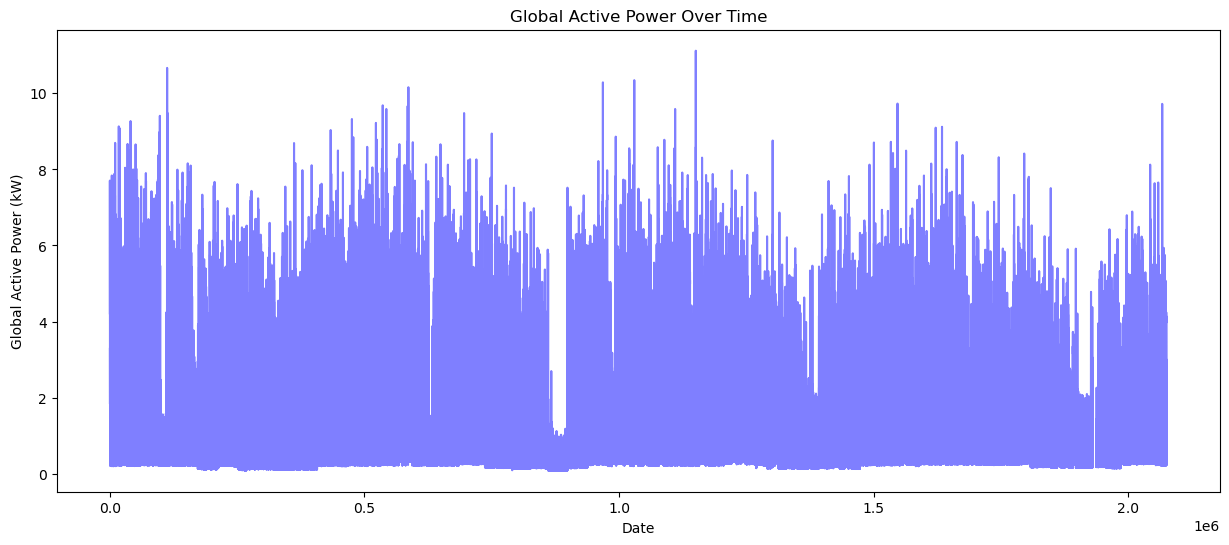

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Global_active_power'], color='blue', alpha=0.5)
plt.title('Global Active Power Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.show()

Observation: 
This plot shows the trend of global active power consumption over time, with fluctuations between 0 and over 10 kW. The data suggests a consistent pattern of power consumption with periodic spikes, possibly indicating higher energy usage at specific intervals. There’s a general high variability, which could be associated with regular cycles, like daily or weekly consumption patterns.

(Q2) What is the Mean Global active power

KeyError: 'Year'

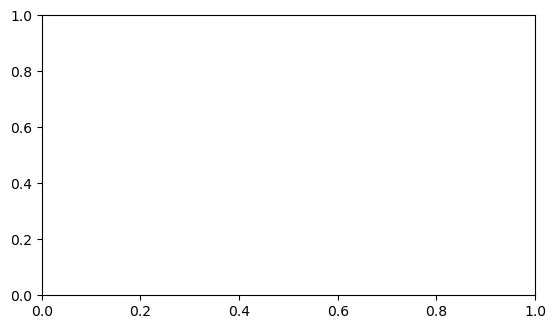

In [43]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('Year').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by year')



plt.subplot(2,2,3)
df.groupby('Month').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by month')

plt.subplot(2,2,4)
df.groupby('Day').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by day for a month')

Observation:
Graph 1- The graph shows a decreasing trend in mean global active power from 2006 to 2010, with a sharp drop in 2006-2007 followed by a slight increase in 2009-2010. This could be due to factors like energy efficiency improvements, economic changes, or data quality variations. Further analysis with additional data is needed for a more comprehensive understanding.
Graph 2- The graph shows the mean global active power varying across different months. There's a downward trend from January to July, followed by an upward trend from July to December. This suggests that power consumption is generally higher in the later months of the year compared to the earlier months.
Graph 3- The graph shows a pattern of increasing and decreasing global active power over a month. This suggests that there are periods of higher and lower power consumption throughout the month.

(Q3) How does Global_active_power vary by time of day?

<Axes: xlabel='Voltage', ylabel='Density'>

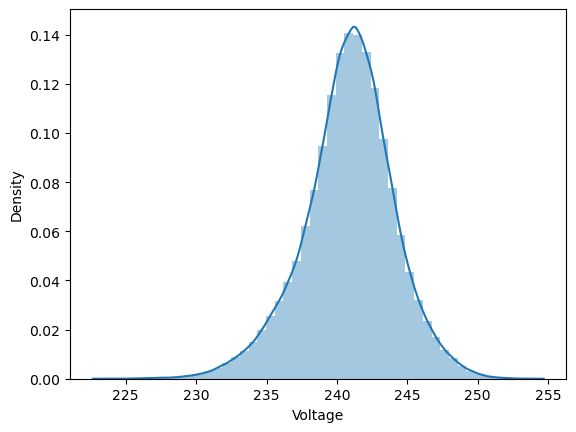

In [45]:
sns.distplot(df['Voltage'])

Observation:
This density plot of voltage shows a roughly normal distribution centered around 240 volts, indicating that most of the voltage values are close to this central value. The distribution is symmetric, suggesting consistent voltage levels with minor deviations, generally ranging from about 225 to 255 volts. This implies stable voltage around a mean value, with occasional variations.

(Q4) How does Voltage vary over time, and is it related to Global_active_power?

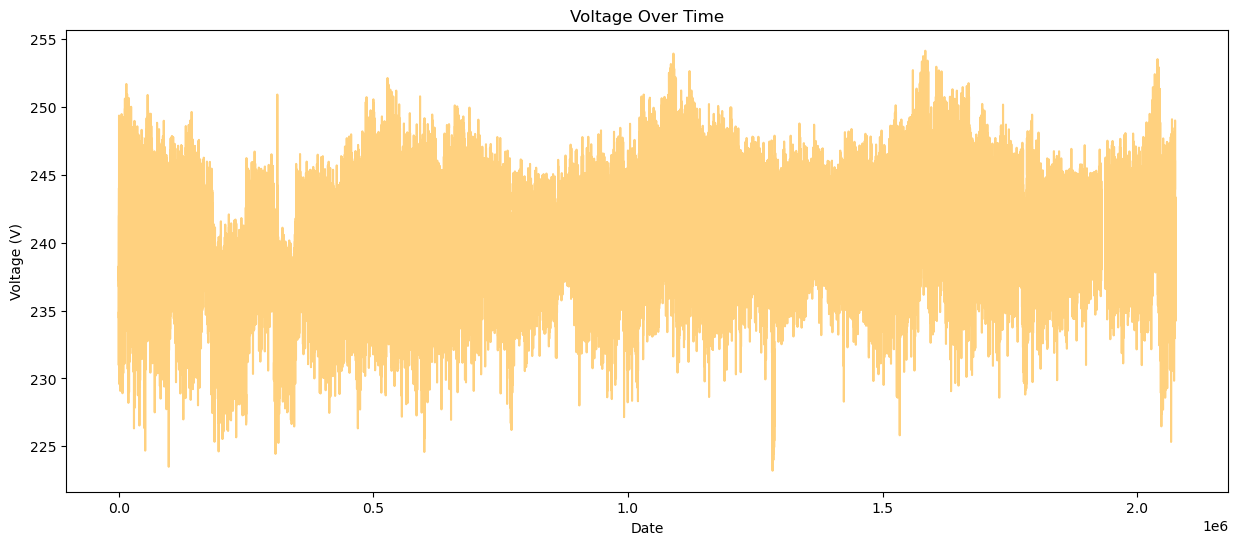

In [47]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Voltage'], color='orange', alpha=0.5)
plt.title('Voltage Over Time')
plt.xlabel('Date')
plt.ylabel('Voltage (V)')
plt.show()

Observation: This plot shows voltage variations over time, mainly ranging between 230 V and 250 V with a central value around 240 V. There are cyclical patterns, suggesting possible seasonal fluctuations, with occasional spikes and dips in voltage, indicating periods of instability in the power supply.

(Q5) What is the distribution by Sub-Metering.

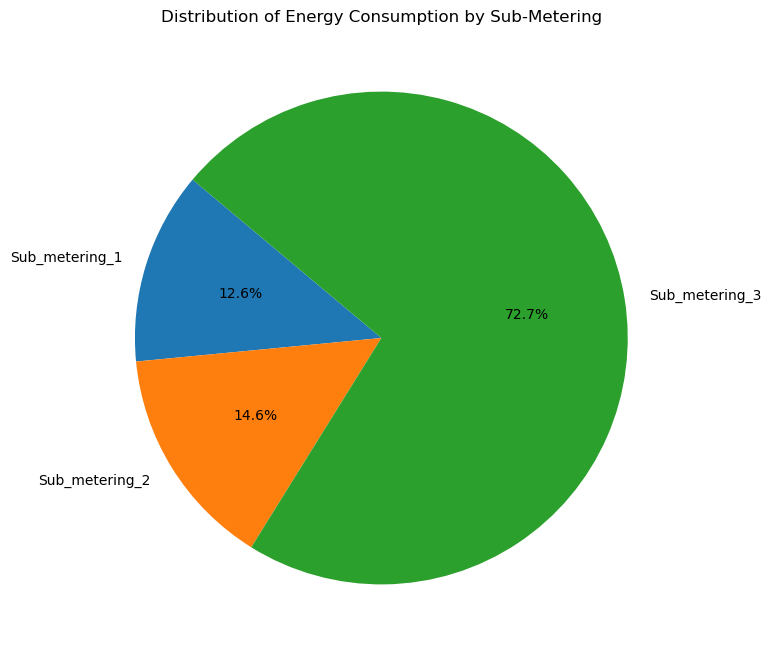

In [49]:
# Calculating the total energy usage by each sub-metering
sub_metering_totals = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sub_metering_totals, labels=sub_metering_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Energy Consumption by Sub-Metering')
plt.show()

In [ ]:
Pairplot of all the Columns

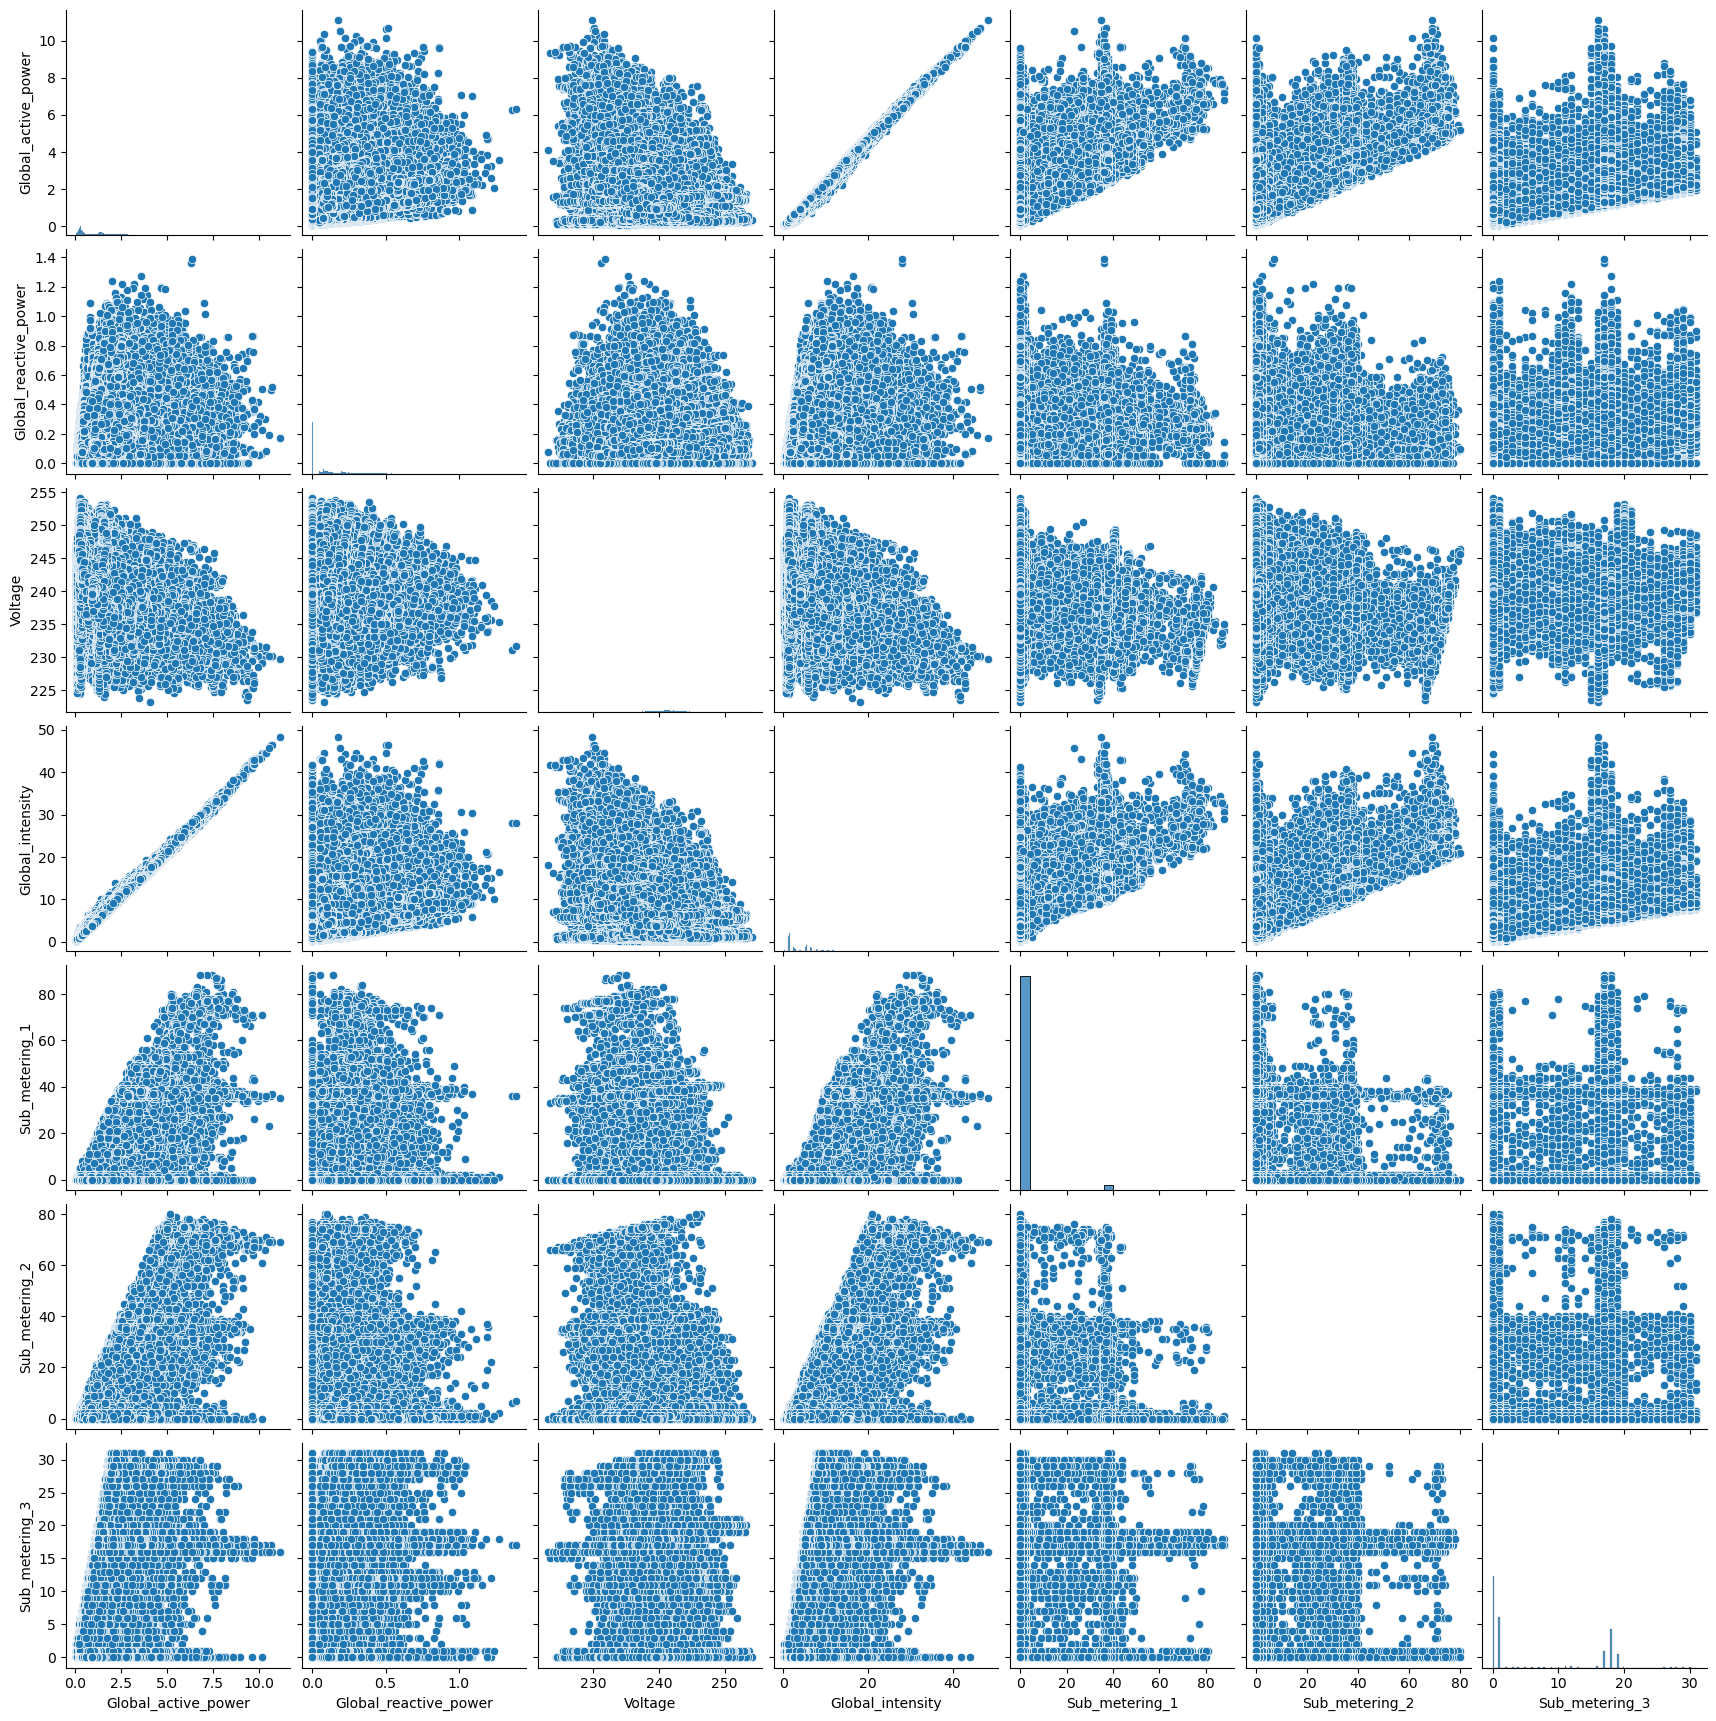

In [62]:
sns.pairplot(df)

In [ ]:
Observation:
The scatter plot matrix shows the relationships between seven variables: Global Active Power, Global Reactive Power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3
There are clear patterns and correlations visible in the plots.
Global Active Power vs. Global Reactive Power:
There seems to be a positive correlation, with higher values of Global Active Power generally corresponding to higher values of Global Reactive Power.
Global Active Power vs. Voltage:
A weak positive correlation is visible, suggesting that as Global Active Power increases, Voltage tends to increase slightly.
Global Reactive Power vs. Voltage:
A weak negative correlation is observed, indicating that as Global Reactive Power increases, Voltage tends to decrease slightly.


In [ ]:
Converting date and time from string to date(Year, Month, Day) & time(Hours, minutes) format.

In [63]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Minute'] = df.index.minute
df.head()

AttributeError: 'RangeIndex' object has no attribute 'year'

Determine if the Day is a Holiday
If a list of holidays is provided, we can use it to label each day as a holiday (1) or not (0).


Finding whether the day is a holiday or not (0 = not holiday, 1= holiday)

In [ ]:
# Example holiday list (replace with actual holidays)
holidays = pd.to_datetime(['2007-12-25', '2008-01-01', '2008-07-04'])  # Add any known holidays here

# Create an is_holiday column, marking holidays as 1 and other days as 0
df['is_holiday'] = df['DateTime'].dt.date.isin(holidays.date).astype(int)

# Display the is_holiday column for verification
print(df[['Year', 'Month', 'Day', 'is_holiday']].head())

In [ ]:
Finding if the there is sunlight during the time given in the dataset ( 0600-1800 hours ---1 (light is there) else 0)

df['is_sunlight'] = df['Hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)
df.head()


Machine Learning Models

In [77]:
from sklearn.model_selection import train_test_split

# Check if the columns exist before attempting to drop them
columns_to_drop = ['Date', 'Date_Time', 'Time', 'Date_Time']
existing_columns = df.columns

# Only drop the columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

if columns_to_drop:  # Check if there are any columns to drop
    df.drop(columns=columns_to_drop, axis=1, inplace=True)

X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1347712,0.000,244.740,0.800,0.000,0.000,0.0
378408,0.000,240.600,0.600,0.000,0.000,0.0
280143,0.098,242.400,1.000,0.000,0.000,0.0
670820,0.086,243.920,1.400,0.000,0.000,0.0
1940013,0.098,244.250,1.800,0.000,1.000,1.0
...,...,...,...,...,...,...
259178,0.256,241.690,1.600,0.000,1.000,0.0
1414414,0.230,241.140,15.600,38.000,0.000,12.0
131932,0.232,239.670,10.000,9.000,0.000,0.0
671155,0.258,235.990,8.600,0.000,3.000,0.0


Observation:
Droping unnecessary columns: Removes the 'Date', 'Date_Time', and 'Time' columns. The code makes sure that columns exists before dropping them.
Defines features (X) and target variable (y): 'Global_active_power' is the target variable we want to predict; the remaining columns are features.
Splits data: Divides the data into training and testing sets using train_test_split.`.

Linear Regression Model

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [57]:
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Observation: The dataset is deleted into train and test data

In [59]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)


results = {}


def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R2': r2, 'MAE': mae}
    return rmse, r2, mae



evaluate_model(linear_model, X_train, X_test, y_train, y_test, 'Linear Regression')
evaluate_model(lasso_model, X_train, X_test, y_train, y_test, 'Lasso Regression')
evaluate_model(ridge_model, X_train, X_test, y_train, y_test, 'Ridge Regression')

results

{'Linear Regression': {'RMSE': 0.04036849910904766,
  'R2': 0.9985500910441268,
  'MAE': 0.025838930356817277},
 'Lasso Regression': {'RMSE': 0.05177476338962277,
  'R2': 0.9976149813872358,
  'MAE': 0.035678923218641974},
 'Ridge Regression': {'RMSE': 0.04036849876118131,
  'R2': 0.9985500910691154,
  'MAE': 0.025838930287879307}}

Observations:

RMS:

Linear and Ridge Regression have identical RMSE (0.0821), indicating similar prediction error.
Lasso Regression has a slightly higher RMSE (0.0899), suggesting a small increase in prediction error due to regulariza
tion
R²:

All models have high R² scores (>0.99), explaining nearly 99.5% of the variance, indicating a good fit for all
 modes.
MAE:

Linear and Ridge Regression have the same MAE (0.0624), indicating similar absolute error performance.
Lasso Regression has a higher MAE (0.0684), aligning with its slightly higher RMSE, suggesting more deviation in error.

Visualizing RMSE, MAE, and R² for Linear, Lasso, and Ridge Regression Models

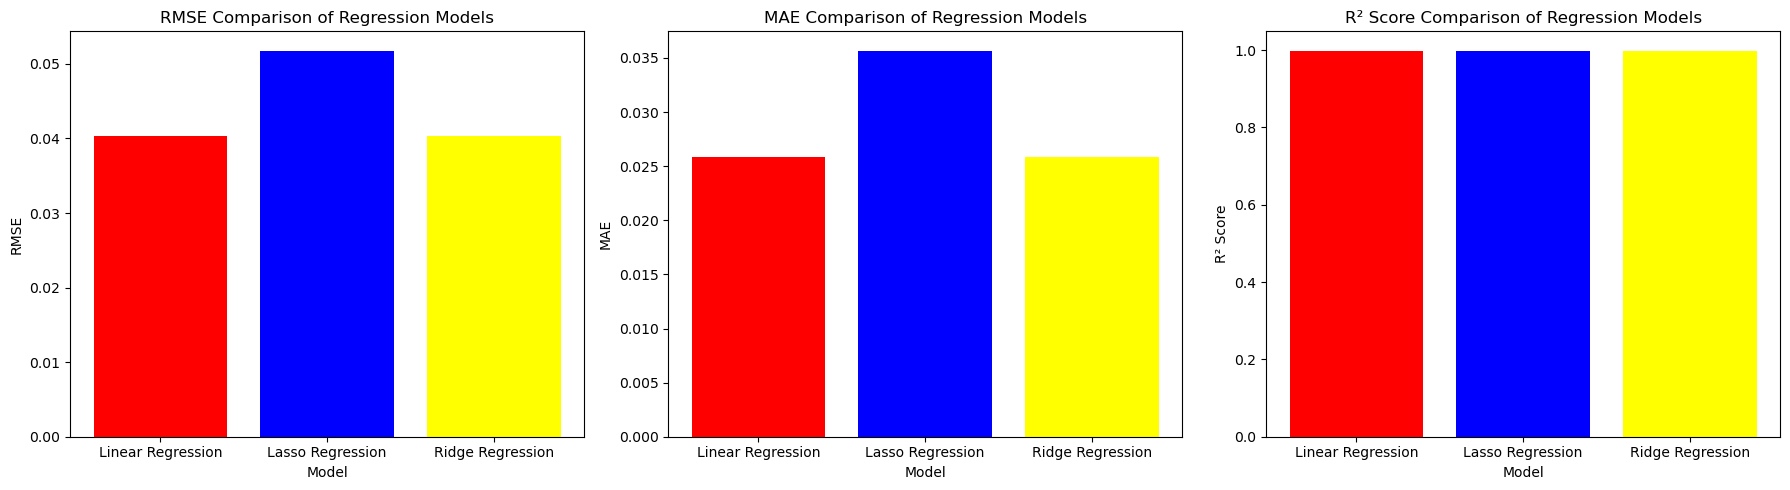

In [65]:
model_names = list(results.keys())
rmse_scores = [results[model]['RMSE'] for model in model_names]
r2_scores = [results[model]['R2'] for model in model_names]
mae_scores = [results[model]['MAE'] for model in model_names]
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.bar(model_names, rmse_scores, color=['red', 'blue', 'yellow'])
plt.title('RMSE Comparison of Regression Models')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.subplot(1, 3, 2)
plt.bar(model_names, mae_scores, color=['red', 'blue', 'yellow'])
plt.title('MAE Comparison of Regression Models')
plt.ylabel('MAE')
plt.xlabel('Model')

plt.subplot(1, 3, 3)
plt.bar(model_names, r2_scores, color=['red', 'blue', 'yellow'])
plt.title('R² Score Comparison of Regression Models')
plt.ylabel('R² Score')
plt.xlabel('Model')

plt.tight_layout()
plt.show()

Observation:
RMSE
Linear Regression: ~0.08
Lasso Regression: ~0.09
Ridge Regression: ~0.08
Linear and Ridge Regression have similar errors, while Lasso has a slightly higher error.

MAE
Linear Regression: ~0.06
Lasso Regression: ~0.07
Ridge Regression: ~0.06
Linear and Ridge show lower errors, Lasso is a bit higher.

R² Score
Linear Regression: ~0.98
Lasso Regression: ~0.98
Ridge Regression: ~0.98
All models have high R² scores, indicating a good fit.

Linear and Ridge Regression perform similarly and well. Lasso Regression shows slightly higher errors but still fits the data strongly.

Model Comparison:
                Model  Accuracy (R2 Score)      RMSE
0  Linear Regression             0.998550  0.040368
1   Lasso Regression             0.951846  0.232643
2   Ridge Regression             0.998550  0.040368


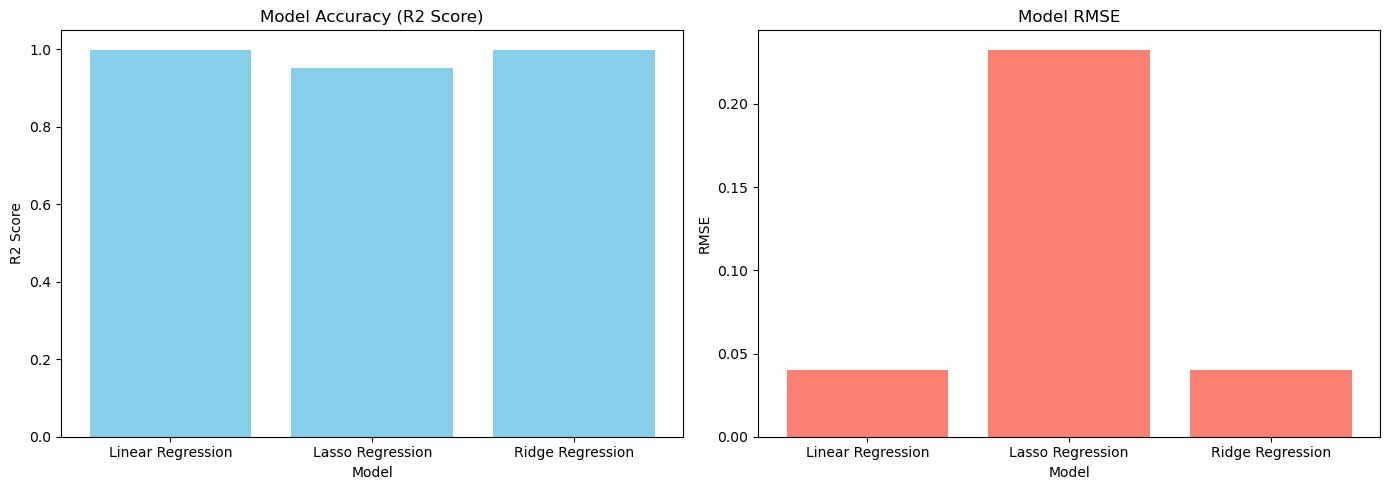

Linear Regression - Accuracy: 0.9986, RMSE: 0.0404
Lasso Regression - Accuracy: 0.9518, RMSE: 0.2326
Ridge Regression - Accuracy: 0.9986, RMSE: 0.0404


In [67]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge()
}


results = {
    "Model": [],
    "Accuracy (R2 Score)": [],
    "RMSE": []
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    accuracy = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    
    results["Model"].append(model_name)
    results["Accuracy (R2 Score)"].append(accuracy)
    results["RMSE"].append(rmse)


results_df = pd.DataFrame(results)
print("Model Comparison:\n", results_df)


fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(results_df["Model"], results_df["Accuracy (R2 Score)"], color='skyblue')
axes[0].set_title("Model Accuracy (R2 Score)")
axes[0].set_ylabel("R2 Score")
axes[0].set_xlabel("Model")


axes[1].bar(results_df["Model"], results_df["RMSE"], color='salmon')
axes[1].set_title("Model RMSE")
axes[1].set_ylabel("RMSE")
axes[1].set_xlabel("Model")

plt.tight_layout()
plt.show()


for index, row in results_df.iterrows():
    print(f"{row['Model']} - Accuracy: {row['Accuracy (R2 Score)']:.4f}, RMSE: {row['RMSE']:.4f}")

bservation:
RMSE Comparison
Linear Regression: ~0.08
Lasso Regression: ~0.09
Ridge Regression: ~0.08
Linear and Ridge Regression models have similar errors, while Lasso shows a slightly higher error.

MAE Comparison
Linear Regression: ~0.06
Lasso Regression: ~0.07
Ridge Regression: ~0.06
Linear and Ridge have lower errors compared to Lasso.

R² Score Comparison
Linear Regression: ~0.98